In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [382]:
df = pd.read_csv('daily_sales_1002.csv', encoding='ISO-8859-1', dtype={'article':'str','article_text':'str', 'sales_profit': 'float'})
df.head()

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost
0,20210108,000000000001646463,SHE Terry 105x200x40cm grey KRONBORG,1002,821.47,SEK,8.0,1184.0,362.53
1,20201209,000000000003253632,MA 90x200cm PLUS B80 Grey-27 DREAMZONE,1002,12646.59,SEK,9.0,26160.0,13513.41
2,20210427,000000000003250323,MA 80x200cm PLUS F65 DREAMZONE,1002,6262.78,SEK,12.0,11040.0,4777.22
3,20210702,000000000002508340,BM FAGERSTA 70x120cm black,1002,36.16,SEK,1.0,80.0,43.84
4,20210616,000000000004921500,Storage box SMARTSTORE classic 45 w/lid,1002,5253.41,SEK,82.0,9734.4,4480.99


Distribution of the values

array([[<AxesSubplot:title={'center':'calendar_day'}>,
        <AxesSubplot:title={'center':'sales_org'}>,
        <AxesSubplot:title={'center':'sales_profit'}>],
       [<AxesSubplot:title={'center':'quantity'}>,
        <AxesSubplot:title={'center':'sales_excluding_tax'}>,
        <AxesSubplot:title={'center':'cost'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

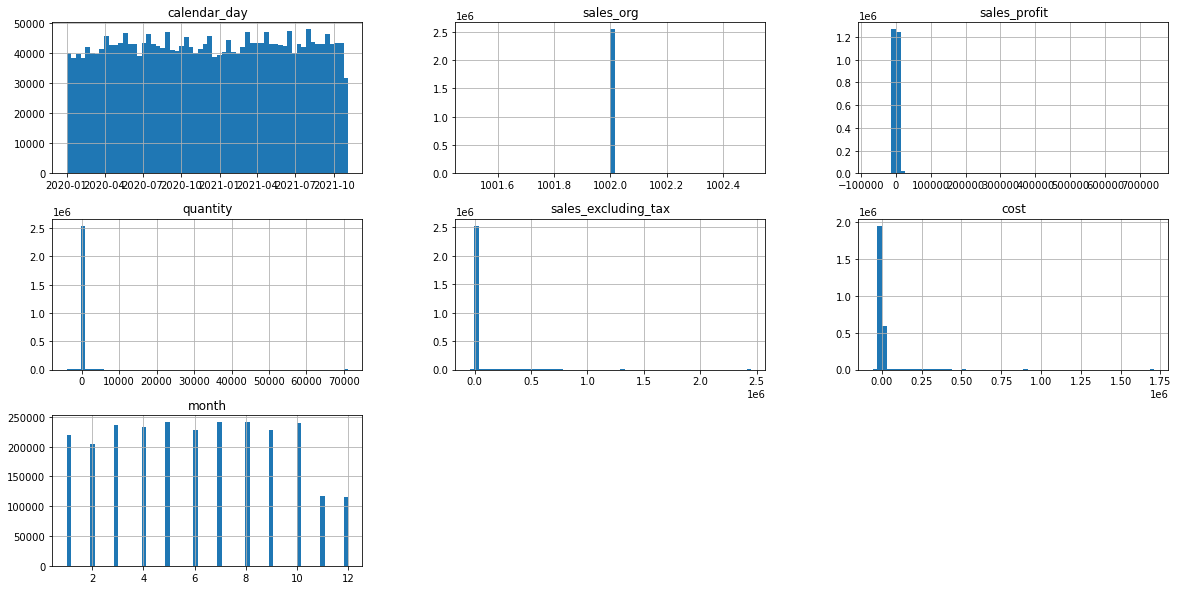

In [423]:
df.hist(bins = 60,figsize = (20,10))

## Data Exploration 

In [384]:
df['article_text'].value_counts()

Fittings                                    9262
TT FLEKKMURE 50x70 3pcs/pk ass.             1465
COA SVARTOR 135cm jacq. grey                1298
MP 90x200cm PLUS T40 DREAMZONE              1229
Tealights PIEREY 100pcs/pk                  1209
                                            ... 
CUR BYRE 1x140x245 natural                     1
MA 90x200cm TEMPRAKON Box                      1
String curtain NISSER 90x245 cream plain       1
Tealightholder as a tree 4 cups                1
CUR STORFOSNA 1x145x245 coral                  1
Name: article_text, Length: 9946, dtype: int64

<AxesSubplot:>

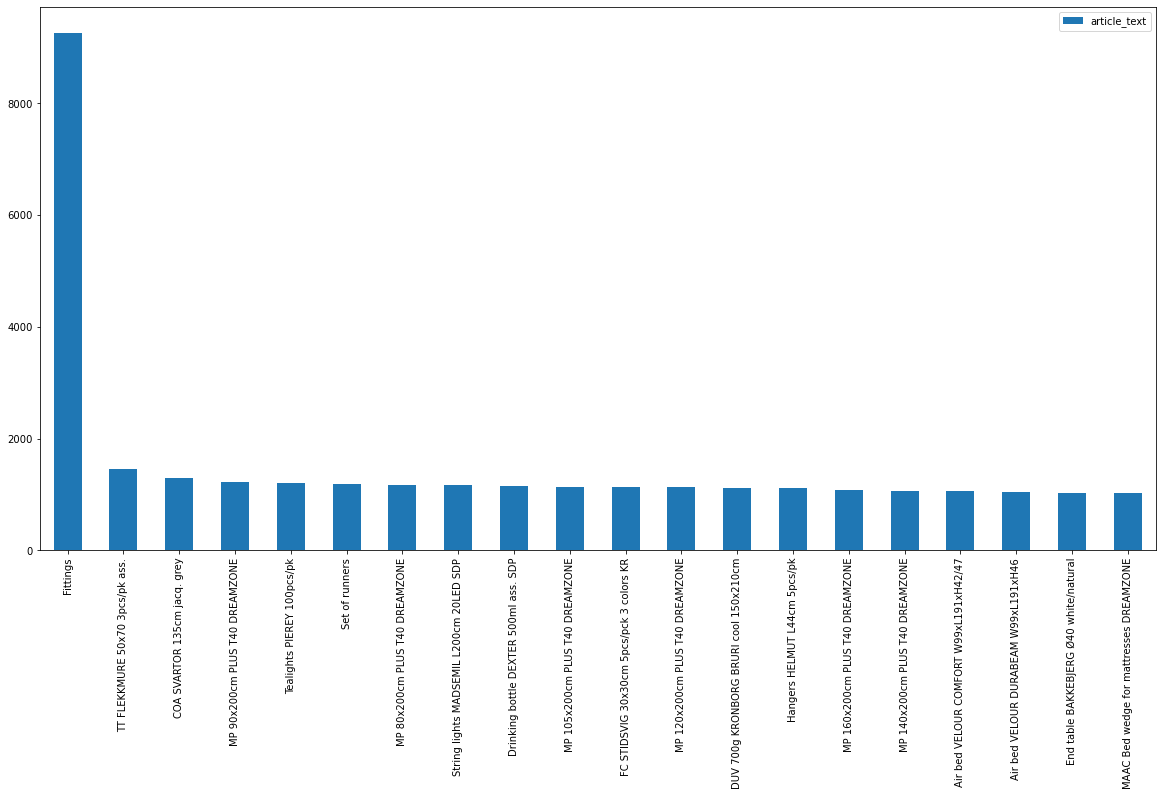

In [385]:
pd.DataFrame(df['article_text'].value_counts().head(20)).plot(kind = 'bar', figsize = (20,10))

<AxesSubplot:>

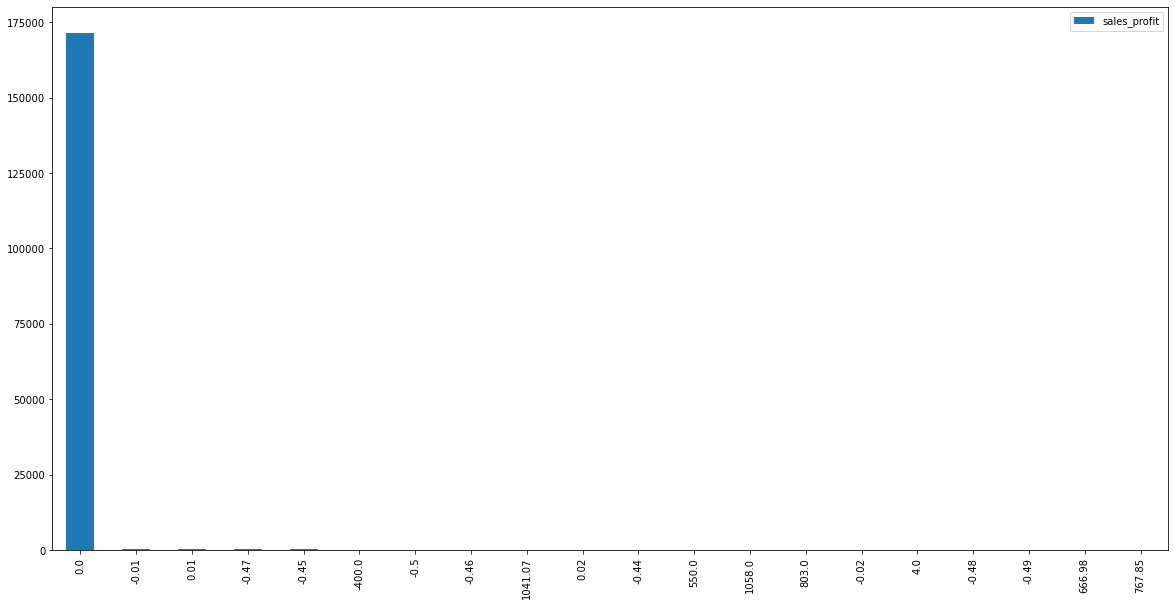

In [386]:
pd.DataFrame(df['sales_profit'].value_counts().head(20)).plot(kind = 'bar', figsize = (20,10))

<AxesSubplot:>

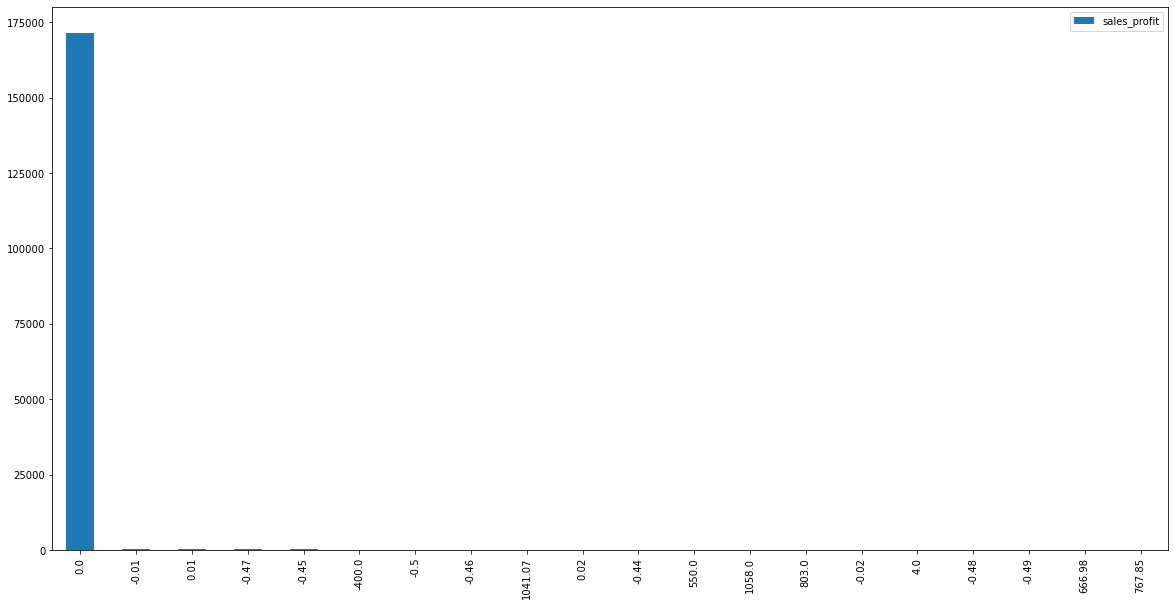

In [387]:
pd.DataFrame(df['sales_profit'].value_counts().head(20)).plot(kind = 'bar', figsize = (20,10))

## Data Wrangling

In [388]:
df.describe()

,calendar_day,sales_org,sales_profit,quantity,sales_excluding_tax,cost
count,2.544735e+06,2544735.0,2.544735e+06,2.544735e+06,2.544735e+06,2.544735e+06
mean,2.020525e+07,1002.0,1.607778e+03,1.855051e+01,2.857790e+03,1.250012e+03
std,4.946806e+03,0.0,4.324751e+03,6.883381e+01,8.066016e+03,4.149701e+03
min,2.020010e+07,1002.0,-6.675900e+04,-4.059000e+03,-4.452935e+04,-5.788395e+04
25%,2.020062e+07,1002.0,1.452000e+02,2.000000e+00,2.880000e+02,1.003100e+02
50%,2.020120e+07,1002.0,5.958700e+02,6.000000e+00,9.928000e+02,3.445400e+02
75%,2.021052e+07,1002.0,1.578530e+03,1.800000e+01,2.640000e+03,1.023545e+03
max,2.021110e+07,1002.0,7.414514e+05,7.117700e+04,2.453447e+06,1.711996e+06


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544735 entries, 0 to 2544734
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   calendar_day           int64  
 1   article                object 
 2   article_text           object 
 3   sales_org              int64  
 4   sales_profit           float64
 5   sales_profit_currency  object 
 6   quantity               float64
 7   sales_excluding_tax    float64
 8   cost                   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 174.7+ MB


In [390]:
df.nunique()

calendar_day                675
article                   12697
article_text               9946
sales_org                     1
sales_profit             575169
sales_profit_currency         1
quantity                   4646
sales_excluding_tax      158990
cost                     456470
dtype: int64

In [391]:
df.duplicated().sum()

0

## Data Cleaning

In [392]:
df.isnull().sum()

calendar_day             0
article                  0
article_text             0
sales_org                0
sales_profit             0
sales_profit_currency    0
quantity                 0
sales_excluding_tax      0
cost                     0
dtype: int64

## Convert 'calender_day' int to date time format.

In [393]:
df['calendar_day'] = pd.to_datetime(df['calendar_day'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544735 entries, 0 to 2544734
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   calendar_day           datetime64[ns]
 1   article                object        
 2   article_text           object        
 3   sales_org              int64         
 4   sales_profit           float64       
 5   sales_profit_currency  object        
 6   quantity               float64       
 7   sales_excluding_tax    float64       
 8   cost                   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 174.7+ MB


In [394]:
df['calendar_day'].min()

Timestamp('2020-01-01 00:00:00')

In [395]:
df['calendar_day'].max()

Timestamp('2021-11-05 00:00:00')

## Create a new column to store months.

In [396]:
df['month'] = df['calendar_day'].dt.month
df.head(3)

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost,month
0,2021-01-08,000000000001646463,SHE Terry 105x200x40cm grey KRONBORG,1002,821.47,SEK,8.0,1184.0,362.53,1
1,2020-12-09,000000000003253632,MA 90x200cm PLUS B80 Grey-27 DREAMZONE,1002,12646.59,SEK,9.0,26160.0,13513.41,12
2,2021-04-27,000000000003250323,MA 80x200cm PLUS F65 DREAMZONE,1002,6262.78,SEK,12.0,11040.0,4777.22,4


## New Dataset for Monthly Sales

In [397]:
monthly_sales = df[['article_text','sales_profit',
       'quantity', 'sales_excluding_tax','month']]
monthly_sales.head()

,article_text,sales_profit,quantity,sales_excluding_tax,month
0,SHE Terry 105x200x40cm grey KRONBORG,821.47,8.0,1184.0,1
1,MA 90x200cm PLUS B80 Grey-27 DREAMZONE,12646.59,9.0,26160.0,12
2,MA 80x200cm PLUS F65 DREAMZONE,6262.78,12.0,11040.0,4
3,BM FAGERSTA 70x120cm black,36.16,1.0,80.0,7
4,Storage box SMARTSTORE classic 45 w/lid,5253.41,82.0,9734.4,6


In [398]:
sns.scatterplot(x="article_text", y="sales_profit", data=df) #continues data

<AxesSubplot:xlabel='article_text', ylabel='sales_profit'>

C:\Users\pralo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)


Error in callback <function flush_figures at 0x000002DD136C6AF0> (for post_execute):


KeyboardInterrupt: 

In [399]:
product_group = df.groupby('article_text')
product_group.sales_excluding_tax.sum().nlargest(10)

article_text
Lounge set ULLEHUSE 6 pers. black         58866498.00
Transport                                 37049576.68
Lounge set TAMBOHUSE 5 pers. grey         37009092.18
Sofa bed chaiselongue VEJLBY dark grey    33888022.30
Lounge set VONGE 5 pers. black            32942864.73
PIL 800g Høie DOWNFEEL 50x60cm            30777806.15
PIL 650g Varnamo KEISAREN 50x60cm         28766862.32
DUV 7 kg CURA PEARL 150x210cm             25621400.36
TM 180x200cm GOLD T65 white/light grey    25329457.31
Recliner chair STORD grey                 24706191.05
Name: sales_excluding_tax, dtype: float64

In [400]:
mask = df['article_text'] == 'Front of drawer'

In [401]:
prod1 = df.loc[df['article_text'] == 'Lounge set ULLEHUSE 6 pers. black'] 
prod1.head()       

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost,month
941,2020-04-17,000000000003782210,Lounge set ULLEHUSE 6 pers. black,1002,1580.33,SEK,1.0,3600.00,2019.67,4
7079,2021-06-21,000000000003700004,Lounge set ULLEHUSE 6 pers. black,1002,119804.81,SEK,46.0,195040.82,75236.01,6
10104,2021-05-16,000000000003700004,Lounge set ULLEHUSE 6 pers. black,1002,108847.91,SEK,51.0,193440.00,84592.09,5
11800,2021-03-08,000000000003700004,Lounge set ULLEHUSE 6 pers. black,1002,31338.31,SEK,10.0,48000.00,16661.69,3
19878,2021-08-27,000000000003700004,Lounge set ULLEHUSE 6 pers. black,1002,25141.61,SEK,16.0,51200.01,26058.40,8


In [402]:
prod1 = prod1.groupby('month').sum()['sales_excluding_tax'].reset_index()

In [403]:
prod1 = prod1.rename(columns = {'sales_excluding_tax':'Lounge set ULLEHUSE 6 pers. black'})
prod1

,month,Lounge set ULLEHUSE 6 pers. black
0,1,125198.40
1,2,233929.73
2,3,9315763.54
3,4,19572876.67
4,5,12437521.41
5,6,4995113.67
6,7,3322973.21
7,8,7177070.11
8,9,1552404.86
9,10,128046.40


In [404]:
prod2 = df.loc[df['article_text'] == 'Lounge set TAMBOHUSE 5 pers. grey'] 
prod2

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost,month
523,2020-02-16,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,0.00,SEK,0.0,0.00,0.00,2
2076,2020-07-29,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,0.00,SEK,0.0,0.00,0.00,7
22165,2021-05-04,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,29428.83,SEK,7.0,67600.00,38171.17,5
36889,2021-07-27,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,17852.71,SEK,2.0,28080.00,10227.29,7
39450,2020-05-23,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,28797.47,SEK,5.0,57600.00,28802.53,5
...,...,...,...,...,...,...,...,...,...,...
2481422,2020-05-31,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,23458.60,SEK,4.0,47200.01,23741.41,5
2485446,2021-06-01,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,31109.54,SEK,5.0,57359.99,26250.45,6
2498339,2021-03-23,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,61124.51,SEK,11.0,118482.39,57357.88,3
2498495,2021-07-10,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,36261.73,SEK,4.0,56799.20,20537.47,7


In [405]:
prod2 = prod2.groupby('month').sum()['sales_excluding_tax'].reset_index()
prod2 = prod2.rename(columns = {'sales_excluding_tax':'Lounge set TAMBOHUSE 5 pers. grey'})
prod2

,month,Lounge set TAMBOHUSE 5 pers. grey
0,1,0.00
1,2,64282.34
2,3,4899826.55
3,4,6524325.21
4,5,11766792.38
5,6,7713878.53
6,7,3461508.81
7,8,2501863.64
8,9,21200.00
9,10,-16585.28


In [406]:
prod3 = df.loc[df['article_text'] == 'Sofa bed chaiselongue VEJLBY dark grey']

In [407]:
prod3 = prod3.groupby('month').sum()['sales_excluding_tax'].reset_index()
prod3 = prod3.rename(columns = {'sales_excluding_tax':'Sofa bed chaiselongue VEJLBY dark grey'})

In [408]:
prod3

,month,Sofa bed chaiselongue VEJLBY dark grey
0,1,2952044.71
1,2,2375190.84
2,3,3216231.16
3,4,2701323.21
4,5,3174653.61
5,6,3333557.92
6,7,3662846.69
7,8,2682401.07
8,9,3409308.78
9,10,3057496.77


In [409]:
prod2_var = prod2['Lounge set TAMBOHUSE 5 pers. grey']
prod3_var = prod3['Sofa bed chaiselongue VEJLBY dark grey']
display(prod2_var)
display(prod3_var)

0            0.00
1        64282.34
2      4899826.55
3      6524325.21
4     11766792.38
5      7713878.53
6      3461508.81
7      2501863.64
8        21200.00
9       -16585.28
10       72000.00
Name: Lounge set TAMBOHUSE 5 pers. grey, dtype: float64

0     2952044.71
1     2375190.84
2     3216231.16
3     2701323.21
4     3174653.61
5     3333557.92
6     3662846.69
7     2682401.07
8     3409308.78
9     3057496.77
10    1830029.88
11    1492937.66
Name: Sofa bed chaiselongue VEJLBY dark grey, dtype: float64

In [410]:
prod1.insert(2, 'Lounge set TAMBOHUSE 5 pers. grey', prod2_var)
prod1.insert(3, 'Sofa bed chaiselongue VEJLBY dark grey', prod3_var )

In [411]:
prod1.head(2)

,month,Lounge set ULLEHUSE 6 pers. black,Lounge set TAMBOHUSE 5 pers. grey,Sofa bed chaiselongue VEJLBY dark grey
0,1,125198.40,0.00,2952044.71
1,2,233929.73,64282.34,2375190.84


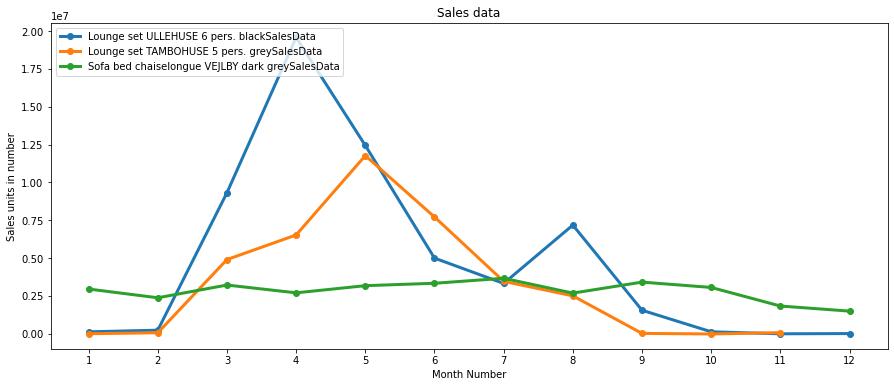

In [412]:
plt.figure(figsize = (15,6))

monthList = prod1['month'].tolist()
LoungeULLEHUSEblackSalesData = prod1['Lounge set ULLEHUSE 6 pers. black'].tolist()
LoungeTAMBOHUSEgreySalesData = prod1['Lounge set TAMBOHUSE 5 pers. grey'].tolist()
SofabedSalesData = prod1['Sofa bed chaiselongue VEJLBY dark grey'].tolist()

plt.plot(monthList, LoungeULLEHUSEblackSalesData  ,   label = 'Lounge set ULLEHUSE 6 pers. blackSalesData', marker='o', linewidth=3)
plt.plot(monthList, LoungeTAMBOHUSEgreySalesData , label = 'Lounge set TAMBOHUSE 5 pers. greySalesData', marker='o', linewidth=3)
plt.plot(monthList, SofabedSalesData, label = 'Sofa bed chaiselongue VEJLBY dark greySalesData', marker='o', linewidth=3)

plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.xticks(monthList)
#plt.yticks([50000.00, 500000.00, 1000000.00, 3000000.00 ,10000000.00, 15000000.00])
plt.title('Sales data')
plt.show()

In [413]:

df_trend


,article_text,month,sales_excluding_tax
0,PIL 650g KUNNA 50x60cm,1,903409.71
1,PIL 650g KUNNA 50x60cm,2,1082496.67
2,PIL 650g KUNNA 50x60cm,3,897698.06
3,PIL 650g KUNNA 50x60cm,4,1026902.79
4,PIL 650g KUNNA 50x60cm,5,1341651.51
5,PIL 650g KUNNA 50x60cm,6,1115732.65
6,PIL 650g KUNNA 50x60cm,7,1702947.33
7,PIL 650g KUNNA 50x60cm,8,2575142.22
8,PIL 650g KUNNA 50x60cm,9,1464857.90
9,PIL 650g KUNNA 50x60cm,10,1736156.16


In [414]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   article_text         36 non-null     object 
 1   month                36 non-null     int64  
 2   sales_excluding_tax  36 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 992.0+ bytes


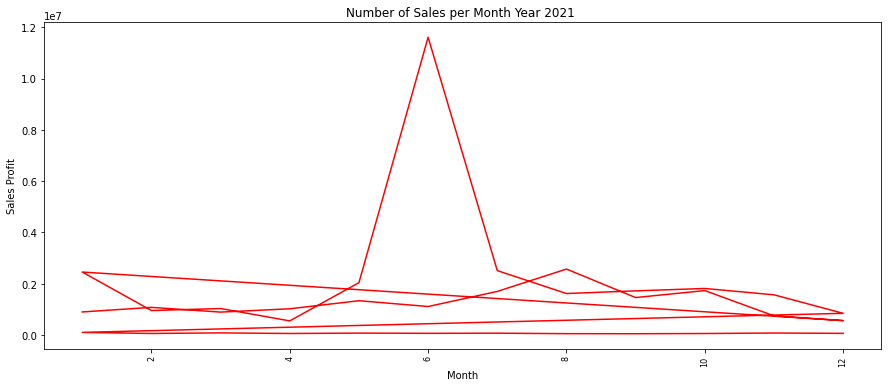

In [415]:
plt.figure(figsize = (15,6))
plt.plot(df_trend['month'],df_trend['sales_excluding_tax'], color = 'red')
plt.title('Number of Sales per Month Year 2021 ')
plt.xlabel('Month')
plt.ylabel('Sales Profit')
plt.xticks(rotation = 'vertical', size = 8)
plt.show()

<Figure size 3600x3600 with 0 Axes>

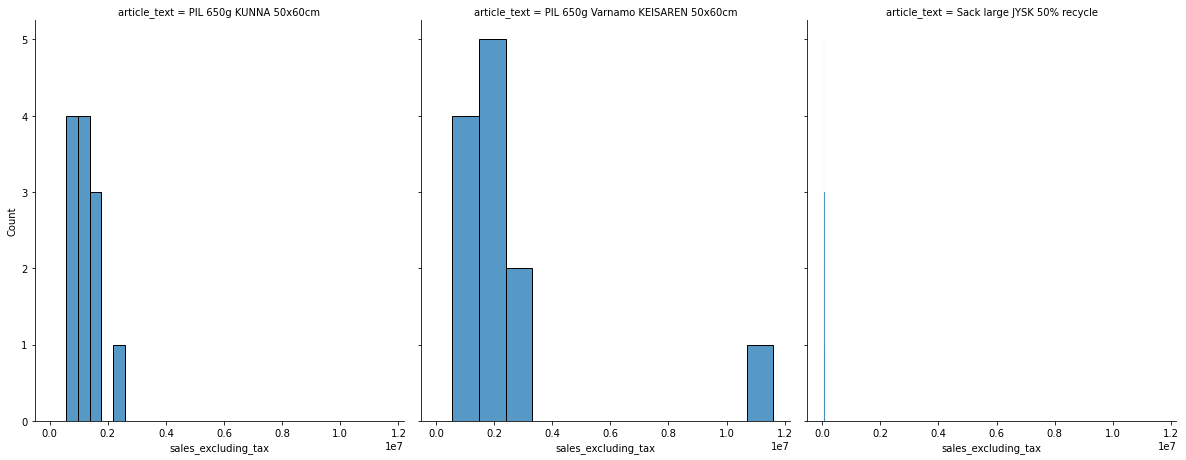

In [416]:
plt.figure(figsize = (50,50))
g = sns.FacetGrid(df_trend, col='article_text',height=6.5, aspect=0.85)
g.map(sns.histplot, "sales_excluding_tax")

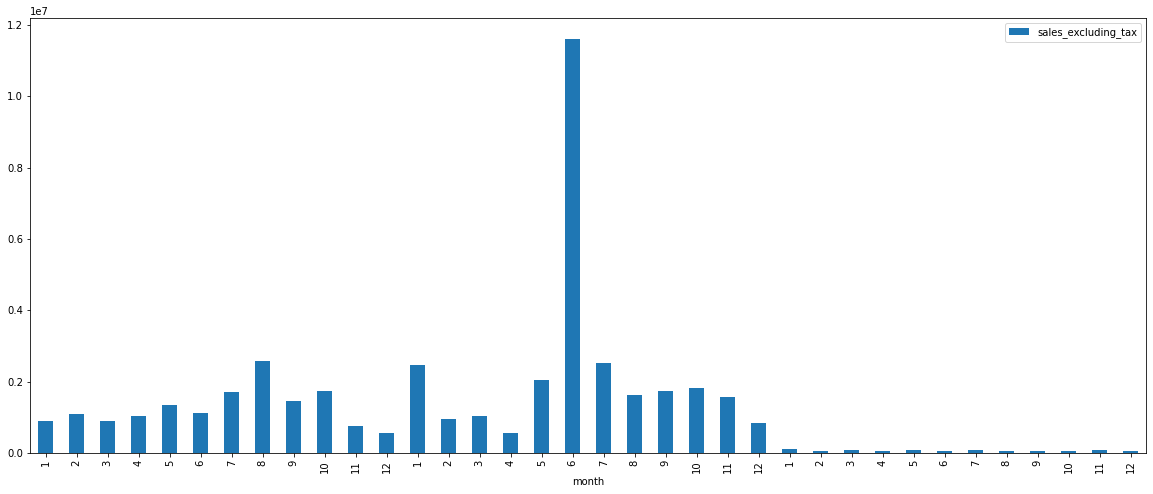

In [417]:
df_res = pd.DataFrame(df_trend, columns=["month", "sales_excluding_tax", "article_text"])
 
# plot the dataframe
df_res.plot(x="month", y=["article_text", "sales_excluding_tax"], kind="bar", figsize=(20, 8))
 
# print bar graph
plt.show()

In [418]:
import pandas as pd
import matplotlib.pyplot as mp

data = result.groupby(['article_text','month']).sum()['sales_excluding_tax'].reset_index()

# form dataframe
data = data.head()

df = pd.DataFrame(data, columns=["article_text", "sales_excluding_tax", "month"])

# plot the dataframe
df.plot(x="article_text", y=["month", "sales_excluding_tax"], kind="bar", figsize=(20, 8))

# print bar graph
mp.show()


KeyError: 'article_text'

In [ ]:
df.groupby('month').sum()

## What was the best month for sales?

In [ ]:
months = range(1,13)
results = df.groupby('month').sum()
plt.bar(month, results['sales_excluding_tax'])
plt.show()

In [ ]:
product_group1 = df.groupby('article_text')
product_group1.sales_excluding_tax.sum().nsmallest(10)

In [ ]:
prod4 = df.loc[df['article_text'] == 'Wardrobe SALTOV 204x222 oak/black'] 
prod4

In [ ]:
prod4 = prod4.groupby('month').sum()['sales_excluding_tax'].reset_index()

In [ ]:
prod4 = prod4.rename(columns = {'sales_excluding_tax':'Wardrobe SALTOV 204x222 oak/black'})
prod4

In [ ]:
prod5 = df.loc[df['article_text'] == 'Coffee table TAMHOLT 50x100 wh/natural'] 
prod5.head(2)

In [ ]:
prod5 = prod5.groupby('month').sum()['sales_excluding_tax'].reset_index()

In [ ]:
prod5 = prod5.rename(columns = {'sales_excluding_tax':'Coffee table TAMHOLT 50x100 wh/natural'})
prod5

In [ ]:
prod6 = df.loc[df['article_text'] == 'BM GIMO 50x80cm natural KR'] 
prod6.head(2)

In [ ]:
prod6 = prod6.rename(columns = {'sales_excluding_tax':'BM GIMO 50x80cm natural KR'})
prod6

In [ ]:
prod5_var = prod5['Coffee table TAMHOLT 50x100 wh/natural']
prod6_var = prod6['BM GIMO 50x80cm natural KR']
display(prod5_var)
display(prod6_var)

In [ ]:
prod4.insert(2, 'Coffee table TAMHOLT 50x100 wh/natural', prod5_var)
prod4.insert(3, 'BM GIMO 50x80cm natural KR', prod6_var )
prod4

In [ ]:
prod4.isnull().sum()

In [ ]:
prod4 = prod4.dropna()

In [ ]:
prod4.isnull().sum()

In [419]:
prod4.insert(2, 'Coffee table TAMHOLT 50x100 wh/natural', prod5_var)
prod4.insert(3, 'BM GIMO 50x80cm natural KR', prod6_var )
prod4

ValueError: cannot insert Coffee table TAMHOLT 50x100 wh/natural, already exists

In [ ]:
plt.figure(figsize = (15,6))

monthList = prod1['month'].tolist()
LoungeULLEHUSEblackSalesData = prod1['Lounge set ULLEHUSE 6 pers. black'].tolist()
LoungeTAMBOHUSEgreySalesData = prod1['Lounge set TAMBOHUSE 5 pers. grey'].tolist()
SofabedSalesData = prod1['Sofa bed chaiselongue VEJLBY dark grey'].tolist()

plt.plot(monthList, LoungeULLEHUSEblackSalesData  ,   label = 'Lounge set ULLEHUSE 6 pers. blackSalesData', marker='o', linewidth=3)
plt.plot(monthList, LoungeTAMBOHUSEgreySalesData , label = 'Lounge set TAMBOHUSE 5 pers. greySalesData', marker='o', linewidth=3)
plt.plot(monthList, SofabedSalesData, label = 'Sofa bed chaiselongue VEJLBY dark greySalesData', marker='o', linewidth=3)

plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.xticks(monthList)
#plt.yticks([50000.00, 500000.00, 1000000.00, 3000000.00 ,10000000.00, 15000000.00])
plt.title('Sales data')
plt.show()